# Dataset & Workload Stats

In [1]:
import collections
import os
from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rc('text', usetex=True)
sns.set_theme(style="whitegrid", font_scale=1.3)

In [2]:
dataset_stats = pd.read_csv('../data/statistics/dataset_stats.csv')

domains = {'airline':'Transportation',
 'imdb':'Entertainment',
 'ssb':'Business',
 'tpc_h':'Business',
 'walmart':'Retail',
 'financial':'Finance',
 'basketball':'Sports',
 'accidents':'Government',
 'movielens':'Entertainment',
 'baseball':'Sports',
 'hepatitis':'Health',
 'tournament':'Sports',
 'credit':'Finance',
 'employee':'Business',
 'consumer':'Retail',
 'geneea':'Government',
 'genome':'Education',
 'carcinogenesis':'Health',
 'seznam':'Retail',
 'fhnk':'Health'}
dataset_stats['domain'] = dataset_stats.dataset_name.map(domains)

dataset_stats

,dataset_name,no_tables,no_relationships,no_columns,size_gb,domain
0,airline,16,27,113,3.278603,Transportation
1,imdb,15,14,82,3.575051,Entertainment
2,ssb,4,3,41,1.149623,Business
3,tpc_h,8,7,61,1.017035,Business
4,walmart,3,2,7,0.081059,Retail
5,financial,8,7,55,0.254128,Finance
6,basketball,9,8,195,0.952195,Sports
7,accidents,3,2,43,0.116725,Government
8,movielens,7,6,24,0.138610,Entertainment
9,baseball,25,24,353,0.317712,Sports


In [70]:
dataset_stats.min()

dataset_name        accidents
no_tables                   3
no_relationships            2
no_columns                  7
size_gb             0.0810592
domain               Business
dtype: object

In [71]:
dataset_stats.max()

dataset_name               walmart
no_tables                       25
no_relationships                27
no_columns                     353
size_gb                    3.57505
domain              Transportation
dtype: object

No of domains: 9


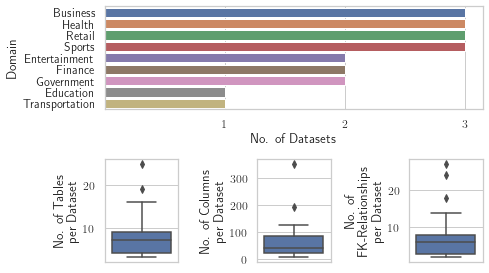

In [77]:
sns.set_theme(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 3, figsize=(7, 4))

for_axes = [axes[1][0], axes[1][1], axes[1][2]]
for i, (col, label) in enumerate([
    ('no_tables', 'No. of Tables \nper Dataset'),
    ('no_columns', 'No. of Columns \nper Dataset'),
    ('no_relationships', 'No. of \nFK-Relationships \nper Dataset')
]):
    ax = for_axes[i]
    sns.boxplot(data=dataset_stats, y=col, ax=ax)
    ax.set_ylabel(label)


gs = axes[0, 0].get_gridspec()
for ax in axes[0]:
    ax.remove()
ax = fig.add_subplot(gs[0, :])
# ax = axes[0][0]
# axes[2][-1].remove()

df_domain = dataset_stats[['domain', 'dataset_name']].groupby(['domain']).count().reset_index()
df_domain.columns = ['domain', 'count']
# print(df_domain['count'].sum())
print(f"No of domains: {len(df_domain['count'])}")
df_domain = df_domain.sort_values(['count'], ascending=False)
# sns.barplot(data=df_domain, y='domain', x='count', ax=ax)
sns.barplot(data=df_domain, y='domain', x='count', ax=ax)
ax.set_ylabel('Domain')
ax.set_xlabel('No. of Datasets')
ax.set_xticks([1,2,3])

plt.tight_layout()
plt.savefig(f'paper_plots/dataset_stats.pdf', bbox_inches='tight')
plt.show()

In [4]:
# complex_workload_200k_s1_c8220.json     99096
# index_workload_100k_s2_c8220.json      100000
# job-light_c8220.json                       50
# scale_c8220.json                          382
# synthetic_c8220.json                     4565
# workload_100k_s1_c8220.json            100000

workload_stats = pd.read_csv('../data/statistics/postgres_workload_stats.csv')
workload_stats

,dataset,workload,no_plans,runtimes,no_tables,no_filters
0,airline,workload_100k_s1_c8220.json,5000,"[3130.607, 1489.273, 4366.177, 1519.294, 2069....","[4, 2, 2, 5, 4, 2, 2, 5, 2, 4, 2, 2, 5, 6, 5, ...","[5, 2, 4, 5, 5, 6, 3, 6, 4, 3, 3, 2, 7, 7, 5, ..."
1,imdb,workload_100k_s1_c8220.json,5000,"[6544.887, 18963.993, 16308.11, 8279.173, 227....","[4, 5, 2, 4, 2, 4, 1, 3, 2, 3, 2, 3, 5, 5, 1, ...","[8, 7, 3, 7, 2, 3, 3, 3, 4, 3, 3, 5, 8, 5, 1, ..."
2,ssb,workload_100k_s1_c8220.json,5000,"[2542.519, 1423.095, 9428.184, 1160.241, 887.7...","[2, 4, 4, 4, 3, 3, 2, 4, 3, 3, 2, 2, 3, 2, 3, ...","[5, 5, 5, 4, 6, 7, 3, 5, 5, 5, 2, 5, 6, 5, 4, ..."
3,tpc_h,workload_100k_s1_c8220.json,5000,"[12202.446, 829.931, 2238.983, 1253.656, 1402....","[6, 1, 6, 6, 1, 5, 2, 4, 6, 2, 6, 4, 4, 5, 5, ...","[8, 4, 6, 8, 3, 10, 5, 7, 10, 5, 5, 4, 4, 4, 9..."
4,walmart,workload_100k_s1_c8220.json,5000,"[365.304, 384.056, 249.8, 385.749, 282.652, 65...","[3, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, ...","[3, 3, 2, 2, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 2, ..."
...,...,...,...,...,...,...
58,seznam,index_workload_100k_s2_c8220.json,5000,"[108.666, 3583.05, 484.397, 100.087, 2522.461,...","[1, 4, 3, 1, 3, 3, 3, 3, 2, 4, 3, 2, 3, 4, 4, ...","[3, 2, 6, 4, 4, 4, 3, 6, 2, 8, 2, 6, 3, 5, 3, ..."
59,fhnk,index_workload_100k_s2_c8220.json,5000,"[1850.457, 465.302, 248.564, 24803.401, 6617.8...","[3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, ...","[3, 1, 3, 5, 3, 4, 7, 5, 1, 1, 5, 3, 4, 5, 2, ..."
60,imdb,synthetic_c8220.json,4565,"[2428.32, 2874.218, 20625.223, 4368.807, 4299....","[1, 2, 2, 3, 3, 2, 3, 1, 3, 1, 3, 1, 2, 3, 3, ...","[1, 4, 2, 4, 6, 3, 4, 1, 5, 2, 3, 2, 2, 5, 6, ..."
61,imdb,scale_c8220.json,382,"[3566.861, 225.883, 17052.73, 318.693, 2081.28...","[2, 1, 4, 1, 2, 1, 2, 4, 1, 2, 2, 2, 3, 2, 2, ...","[3, 1, 4, 1, 2, 1, 1, 6, 1, 1, 2, 3, 3, 1, 2, ..."


In [5]:
workload_stats.workload.unique()

array(['workload_100k_s1_c8220.json',
       'complex_workload_200k_s1_c8220.json',
       'index_workload_100k_s2_c8220.json', 'synthetic_c8220.json',
       'scale_c8220.json', 'job-light_c8220.json'], dtype=object)

Workload default
	No queries: 100000
	Total Runtime (h): 81.92


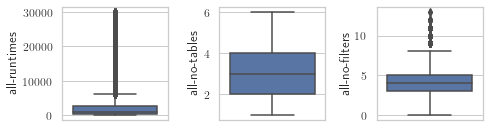

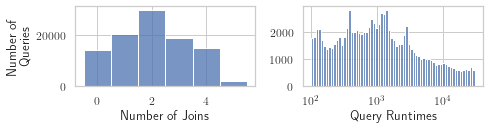

Workload complex
	No queries: 99096
	Total Runtime (h): 80.33


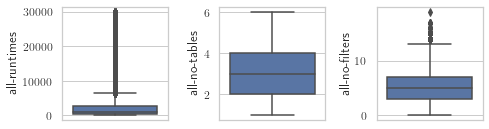

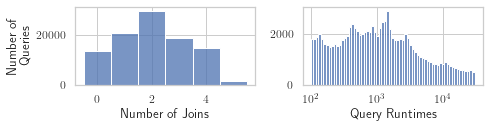

Workload index
	No queries: 100000
	Total Runtime (h): 82.95


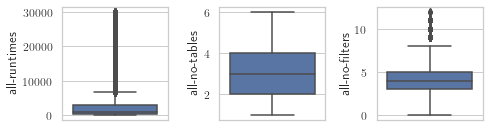

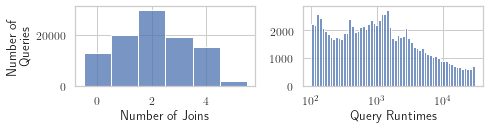

In [6]:
for wl_label, wl in [('default', 'workload_100k_s1_c8220.json'),
                     ('complex', 'complex_workload_200k_s1_c8220.json'),
                     ('index', 'index_workload_100k_s2_c8220.json')]:

    all_runtimes = []
    all_no_tables = []
    all_no_filters = []

    for _, r in workload_stats[workload_stats.workload == wl].iterrows():
        all_no_tables += literal_eval(r.no_tables)
        all_no_filters += literal_eval(r.no_filters)
        all_runtimes += literal_eval(r.runtimes)

    print(f"Workload {wl_label}")
    print(f"\tNo queries: {len(all_runtimes)}")
    print(f"\tTotal Runtime (h): {sum(all_runtimes) / (1000 * 3600):.2f}")

    dataset_cols = [
        (all_runtimes, 'all-runtimes'),
        (all_no_tables, 'all-no-tables'),
        (all_no_filters, 'all-no-filters')
    ]

    sns.set_theme(style="whitegrid", font_scale=1.1)

    fig, axes = plt.subplots(1, len(dataset_cols), figsize=(7, 2))
    for i, (col_data, label) in enumerate(dataset_cols):
        ax = axes[i]
        sns.boxplot(y=col_data, ax=ax)
        ax.set_ylabel(label)

    plt.tight_layout()
    # plt.savefig(f'paper_plots/dataset_stats.pdf', bbox_inches='tight')
    plt.show()

    sns.set_theme(style="whitegrid", font_scale=1.1)
    fig, axes = plt.subplots(1, 2, figsize=(7, 2))
    handles = None
    linewidth = 3

    sns.histplot(np.array(all_no_tables) - 1,
                 ax=axes[0],
                 discrete=True
                 )
    axes[0].set(xlabel='Number of Joins', ylabel='Number of \nQueries')

    sns.histplot(all_runtimes,
                 log_scale=True,
                 ax=axes[1]
                 )
    axes[1].set(xlabel='Query Runtimes', ylabel=None)

    plt.tight_layout()

    path = f'paper_plots/{wl_label}_workload_stats.pdf'
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.savefig(path, bbox_inches='tight')
    plt.show() 

## SPN statistics

In [6]:
df_spn_stats = pd.read_csv('../data/statistics/spn_stats.csv')
df_spn_stats.learn_time /= 60 # have it in mins
df_spn_stats

,database,learn_time,ens_style
0,imdb,16.634801,binary
1,imdb,8.571546,binary
2,imdb,4.562343,binary
3,imdb,4.806272,binary
4,imdb,7.479488,binary
...,...,...,...
293,imdb_full,0.000028,single
294,imdb_full,2.519199,single
295,imdb_full,11.412820,single
296,imdb_full,1.136291,single


In [9]:
df_total_time = df_spn_stats.groupby(['ens_style', 'database']).sum().reset_index()
df_total_time

,ens_style,database,learn_time
0,binary,accidents,117.580665
1,binary,basketball,228.410056
2,binary,carcinogenesis,2.058823
3,binary,consumer,20.284646
4,binary,credit,10.138314
5,binary,employee,15.285697
6,binary,fhnk,58.675219
7,binary,financial,12.134902
8,binary,geneea,63.780183
9,binary,genome,27.329685


Median time to create an ensemble (depending on whether we want a binary ensemble (i.e., an SPN per binary join) or a single ensemble (i.e., an SPN per table))

In [10]:
df_total_time.groupby(['ens_style']).median()

,learn_time
ens_style,
binary,20.284646
single,7.284732
